# The Air Traffic and the Air Pollution Analysis

We use the aggregated data that we have generated from the previous step of the data collection and preparation. In this notebook, we process and analyze them further in order to extract the correlation between air pollution and air traffic. Observe each pollutant to find the most related to air traffic.

- COMP-548DLBig Data Management and Processing
- Georgios Christodoulou

#### Data Source
- **Data_Daily_All.csv** aggregated data for air-quality 
- **cyprus_airport_air_traffic** aggregated data for total air-traffic in cyprus

In [1]:
# add visualization libraries
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np

df_quality = pd.read_csv("..\datasets\cyprus_air_quality\Data_Daily_All.csv")
df_quality['date'] = pd.to_datetime(df_quality['date'])
df_quality = df_quality.loc[df_quality['date'].dt.year >= 2017]
print(df_quality.shape)
df_quality.head(5)

(107733, 10)


,Unnamed: 0,date,station_code,pollutant_id,mean_pollutant_value,year,station_name_en,pollutant_code,pollutant_name_en,Unit_of_measurement_en
0,0,2021-08-10,1,45,0.442803,2021,Nicosia -Traffic Station,C6H6,Benzene,μg/m³
1,1,2021-01-16,5,45,0.640417,2021,Larnaka - Traffic Station,C6H6,Benzene,μg/m³
2,2,2021-05-20,5,45,0.577083,2021,Larnaka - Traffic Station,C6H6,Benzene,μg/m³
3,3,2021-05-28,8,45,0.226250,2021,Zygi -Industrial Station,C6H6,Benzene,μg/m³
4,4,2021-08-19,8,45,0.181667,2021,Zygi -Industrial Station,C6H6,Benzene,μg/m³


In [3]:
#Pivod tha data
idx = ['date','station_code']
col = ['pollutant_code']
val = ['mean_pollutant_value']

pollutants = df_quality.pollutant_code.unique()

## pivot data by Date, Station Code and Pollutant
df_quality = df_quality.pivot(index=idx, columns= col, values=val).reset_index()
df_quality.columns = df_quality.columns.droplevel(0)
df_quality.columns.values[0] = 'date'
df_quality.columns.values[1] = 'station_code'
df_quality.head(10)

pollutant_code,date,station_code,C6H6,CO,NO,NO2,NOX,O3,SO2
0,2017-01-01,1,2.791667,842.805556,19.819167,22.656250,53.040000,34.787273,1.470870
1,2017-01-01,2,NaN,553.710833,7.883750,22.525000,34.612500,35.771667,2.425000
2,2017-01-01,3,NaN,604.545000,14.401250,31.148333,53.231667,31.160417,3.329167
3,2017-01-01,5,NaN,577.098750,13.064583,27.580417,47.609167,34.116250,1.812500
4,2017-01-01,8,0.358333,NaN,0.954167,3.523750,4.986667,56.513750,0.329412
5,2017-01-01,9,0.795455,177.931364,0.070000,2.707619,2.660476,72.954091,0.750870
6,2017-01-01,14,NaN,NaN,0.732500,4.018750,4.038000,59.083750,0.742105
7,2017-01-01,15,1.325000,241.750417,3.757917,14.080833,19.847083,57.469583,3.955833
8,2017-01-01,16,NaN,480.221667,10.334167,22.690833,38.535417,43.600833,1.705417
9,2017-01-02,1,2.187500,673.500000,25.276250,26.336667,65.135000,34.574167,1.916522


In [4]:
df_traffic = pd.read_csv("..\datasets\cyprus_airport_air_traffic\csv\CYPRUS_AIRPORTS_DAILY_AIR_TRAFFIC_2018_2021_TOTAL.csv")
df_traffic['date'] = pd.to_datetime(df_traffic['date'])
df_traffic = df_traffic.loc[df_quality['date'].dt.year >= 2017]
df_traffic
#Merge the data and apply conver data to timestamp
df_quality_traffic = df_quality.merge(df_traffic,how='inner', on=["date","station_code"])
df_quality_traffic.head(5)

,date,station_code,C6H6,CO,NO,NO2,NOX,O3,SO2,airport,total_flights
0,2017-01-01,5,NaN,577.098750,13.064583,27.580417,47.609167,34.116250,1.812500,Larnaka,88.0
1,2017-01-01,15,1.325000,241.750417,3.757917,14.080833,19.847083,57.469583,3.955833,Pafos,22.0
2,2017-01-02,5,NaN,476.007500,10.798750,25.027083,41.584167,44.053333,0.819565,Larnaka,123.0
3,2017-01-02,15,0.879167,223.594167,2.380833,7.021667,10.672917,76.737083,3.336667,Pafos,16.0
4,2017-01-03,5,NaN,865.362083,39.638333,46.287917,107.062083,24.330000,2.863478,Larnaka,127.0


##### Check for Missing values and Fill
the missing values distributed throughout the months we prefer to use the mean of the month to fulfill them

In [5]:
# Check for missing values
columns_missing_values = {}
df = df_quality_traffic.copy()
for c in df.columns:
    msv = df[df[c].isna()| df[c].eq(' ')].shape[0]
    columns_missing_values[c] = (msv,msv/df.shape[0]*100)
    
columns_missing_values

{'date': (0, 0.0),
 'station_code': (0, 0.0),
 'C6H6': (127, 3.477546549835706),
 'CO': (50, 1.3691128148959473),
 'NO': (15, 0.41073384446878425),
 'NO2': (15, 0.41073384446878425),
 'NOX': (15, 0.41073384446878425),
 'O3': (11, 0.30120481927710846),
 'SO2': (27, 0.7393209200438117),
 'airport': (0, 0.0),
 'total_flights': (0, 0.0)}

<AxesSubplot:xlabel='year_month'>

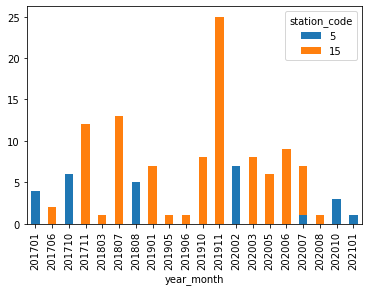

In [6]:
# the missing values distributed throughout the months we prefer to use the mean of the month to fulfill them
df = df_quality_traffic.copy()
df['year_month'] = df['date'].dt.strftime('%Y%m')
df[df['C6H6'].isna()].groupby(['year_month','station_code'])['date'].count().reset_index() \
                .pivot(index='year_month', columns= 'station_code', values='date') \
                .plot.bar(stacked=True)

In [7]:
# update with mean
df = df_quality_traffic.copy()
df['year_month'] = df['date'].dt.strftime('%Y%m')

#df['mean_pollutant_value'].fillna(df.groupby(['year_month','station_code'])['mean_pollutant_value'] \
#                          .transform('mean'), inplace = True)
for p in pollutants:
    df[p].fillna(df.groupby(['year_month','station_code'])[p].transform('mean'), inplace = True)
    
df_quality_traffic  = df.copy()

In [8]:
# Check for missing values
columns_missing_values = {}
df = df_quality_traffic.copy()
for c in df.columns:
    msv = df[df[c].isna()| df[c].eq(' ')].shape[0]
    columns_missing_values[c] = (msv,msv/df.shape[0]*100)
    
columns_missing_values

{'date': (0, 0.0),
 'station_code': (0, 0.0),
 'C6H6': (0, 0.0),
 'CO': (0, 0.0),
 'NO': (0, 0.0),
 'NO2': (0, 0.0),
 'NOX': (0, 0.0),
 'O3': (0, 0.0),
 'SO2': (0, 0.0),
 'airport': (0, 0.0),
 'total_flights': (0, 0.0),
 'year_month': (0, 0.0)}

#### Pollutant Level
Update the dataset with pollutant levels, the higher value of each one indicates the level of pollution

In [9]:
## Value for each polluta
df_pLevels = pd.read_csv("..\datasets\cyprus_air_quality\PollutantsLevels.csv")
print(df_pLevels.shape)
df_pLevels.groupby('pollutant_code')['level_value'].count()

(36, 5)


pollutant_code
C6H6    4
CO      4
NO      4
NO2     4
NOX     4
O3      4
PM10    4
PM25    4
SO2     4
Name: level_value, dtype: int64

In [10]:
def getLevel(pol,value):
    dfr = df_pLevels.loc[(df_pLevels.pollutant_code == pol)&(value >= df_pLevels.min_range)&(value < df_pLevels.max_range)].copy()

    if dfr.empty:
        return 'Error'
    else:
        return  dfr.level_value.values[0] 


In [11]:
df = df_quality_traffic.copy()

p_levels = []
for p in pollutants:
    p_levels.append(p+'_level')
    df[p+'_level'] = df.apply(lambda x: getLevel(p,x[p]), axis=1)

df['pollution_level'] = df[p_levels].max(axis=1)


In [13]:
df_quality_traffic = df.copy()
df_quality_traffic

,date,station_code,C6H6,CO,NO,NO2,NOX,O3,SO2,airport,total_flights,year_month,C6H6_level,CO_level,NO2_level,NOX_level,NO_level,O3_level,SO2_level,pollution_level
0,2017-01-01,5,2.133461,577.098750,13.064583,27.580417,47.609167,34.116250,1.812500,Larnaka,88.0,201701,1,1,1,1,1,1,1,1
1,2017-01-01,15,1.325000,241.750417,3.757917,14.080833,19.847083,57.469583,3.955833,Pafos,22.0,201701,1,1,1,1,1,1,1,1
2,2017-01-02,5,2.133461,476.007500,10.798750,25.027083,41.584167,44.053333,0.819565,Larnaka,123.0,201701,1,1,1,1,1,1,1,1
3,2017-01-02,15,0.879167,223.594167,2.380833,7.021667,10.672917,76.737083,3.336667,Pafos,16.0,201701,1,1,1,1,1,1,1,1
4,2017-01-03,5,2.133461,865.362083,39.638333,46.287917,107.062083,24.330000,2.863478,Larnaka,127.0,201701,1,1,1,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2021-12-29,15,1.377500,246.451667,10.560417,30.457917,46.647917,57.542083,1.048571,Pafos,66.0,202112,1,1,1,1,1,1,1,1
3648,2021-12-30,5,0.936667,320.470417,8.043333,19.402917,31.734167,64.088750,3.497917,Larnaka,105.0,202112,1,1,1,1,1,1,1,1
3649,2021-12-30,15,0.500417,191.602083,3.570000,11.526250,17.001250,70.529583,0.229474,Pafos,47.0,202112,1,1,1,1,1,1,1,1
3650,2021-12-31,5,1.646250,456.147083,11.905000,30.239583,48.491250,48.926667,5.430417,Larnaka,69.0,202112,1,1,1,1,1,1,1,1


#### Plot Pollution_level per Quarter for each Airport

<AxesSubplot:title={'center':'Pollution Level By City'}, xlabel='quarter'>

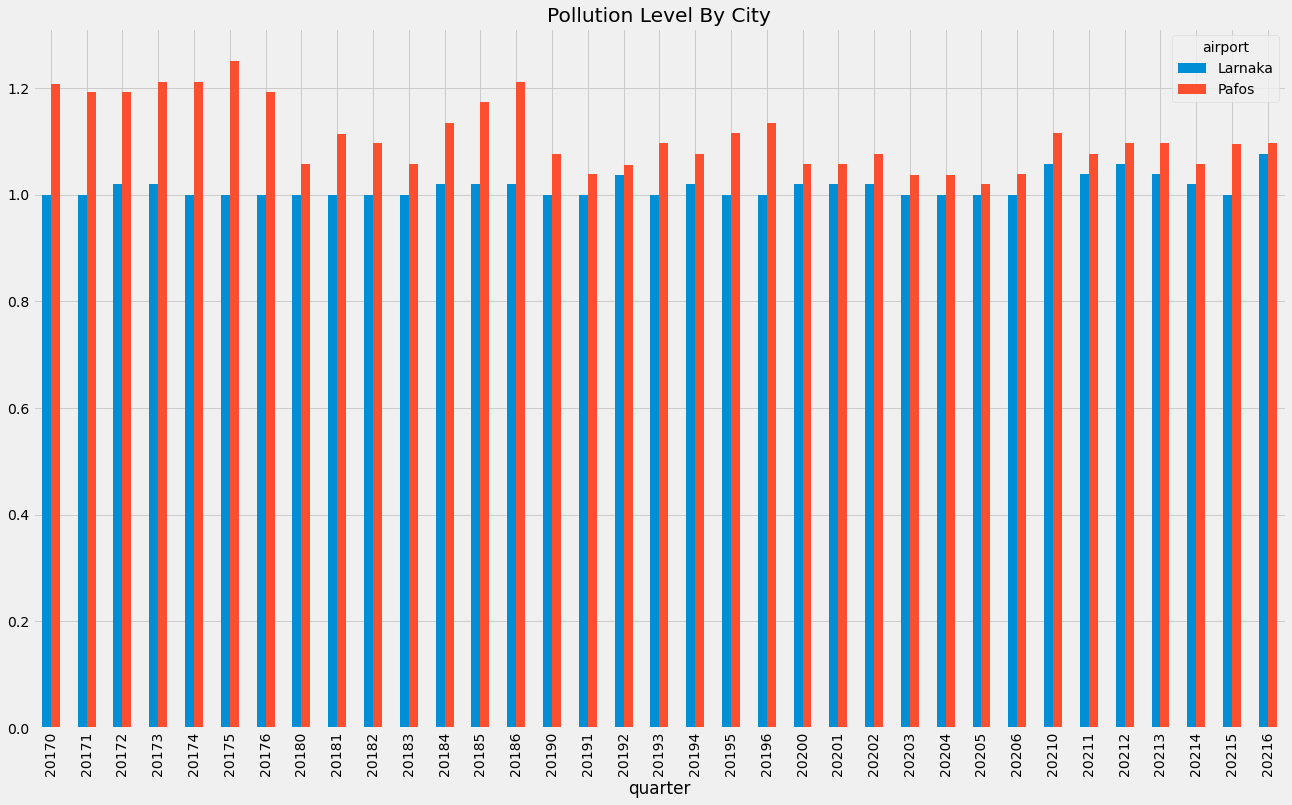

In [24]:
df = df_quality_traffic.copy() #.loc[df_quality_traffic_norm['airport']=='Larnaka']
df['quarter'] = df['date'].dt.strftime('%Y%w') 
df  = df.groupby(['quarter','airport'])['pollution_level'].mean().reset_index()
    
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")

col_val = ['pollution_level']
df = df.pivot(index='quarter', columns= 'airport', values='pollution_level')#.reset_index()

df.plot.bar(figsize=(20, 12), title = 'Pollution Level By City')

##### Check the correlation between pollutants and find the most related to traffic in order to be used for further analysis
The results have there is an interesting correlation around between round to 20-30% between air traffic and pollutants

In [25]:
#### Larnaka
df = df_quality_traffic.loc[(df_quality_traffic.date.dt.year==2020) & (df_quality_traffic['airport']=='Larnaka')].copy()
df['quarter'] = df['date'].dt.strftime('%Y%w') 
col_val = ['C6H6','CO','NO','NOX','O3','SO2','total_flights']
df[col_val].corr().style.background_gradient(cmap='coolwarm')

,C6H6,CO,NO,NOX,O3,SO2,total_flights
C6H6,1.000000,0.849156,0.847494,0.836495,-0.725446,0.442921,0.352621
CO,0.849156,1.000000,0.845648,0.883341,-0.750305,0.372627,0.434327
NO,0.847494,0.845648,1.000000,0.964695,-0.772010,0.444250,0.322344
NOX,0.836495,0.883341,0.964695,1.000000,-0.785032,0.484021,0.360767
O3,-0.725446,-0.750305,-0.772010,-0.785032,1.000000,-0.372023,-0.298318
SO2,0.442921,0.372627,0.444250,0.484021,-0.372023,1.000000,-0.101085
total_flights,0.352621,0.434327,0.322344,0.360767,-0.298318,-0.101085,1.000000


In [26]:
#### Larnaka
df = df_quality_traffic.loc[(df_quality_traffic.date.dt.year==2020) & (df_quality_traffic['airport']=='Pafos')].copy()
df['quarter'] = df['date'].dt.strftime('%Y%w') 
col_val = ['C6H6','CO','NO','NOX','O3','SO2','total_flights']
df[col_val].corr().style.background_gradient(cmap='coolwarm')

,C6H6,CO,NO,NOX,O3,SO2,total_flights
C6H6,1.000000,0.649350,0.689256,0.711671,-0.655673,0.139542,0.273677
CO,0.649350,1.000000,0.614069,0.610619,-0.355903,0.257500,0.310707
NO,0.689256,0.614069,1.000000,0.969411,-0.665078,0.269340,0.155772
NOX,0.711671,0.610619,0.969411,1.000000,-0.709717,0.271930,0.154136
O3,-0.655673,-0.355903,-0.665078,-0.709717,1.000000,-0.181475,-0.164817
SO2,0.139542,0.257500,0.269340,0.271930,-0.181475,1.000000,0.097339
total_flights,0.273677,0.310707,0.155772,0.154136,-0.164817,0.097339,1.000000


,pollutant,coefficient,p-value,t-test
5,O3,-0.3911,0.0,-11.4822
6,SO2,0.1951,0.0,5.3735
4,NO,0.3546,0.0,10.2467
3,NOX,0.4181,0.0,12.4368
0,C6H6,0.4301,0.0,12.8713
2,NO2,0.4437,0.0,13.3773
1,CO,0.4810,0.0,14.8248


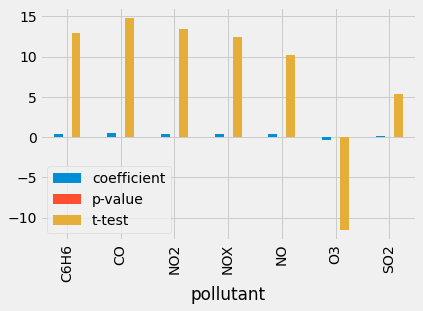

In [42]:
from scipy.stats.stats import pearsonr

df = df_quality_traffic.loc[(df_quality_traffic.date.dt.year==2020)].copy()

pollutants# = df_quality_traffic.pollutant_code.unique()
pvt = []
for pollutant in pollutants:
    #calculation correlation coefficient and p-value between x and y
    x = df[pollutant]
    y = df['total_flights']
    n = df[pollutant].count()
    r,p = pearsonr(x, y)
    t = r*np.sqrt((n-2) / (1-np.power(r,2)))
    pvt.append([pollutant,round(r,4),round(p,4),round(t,4)] )

pvt = pd.DataFrame(pvt, columns=['pollutant','coefficient','p-value','t-test'])
pvt.set_index('pollutant').plot.bar()
pvt.sort_values('coefficient')

<AxesSubplot:xlabel='airport'>

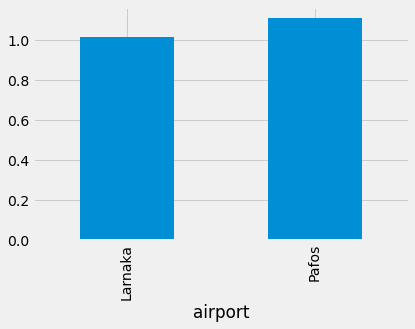

In [43]:
# Mean values per airport/station
df_quality_traffic.groupby('airport')['pollution_level'].mean().plot.bar()

#### Normalize value
- Normalize the scales of features between 0 and 1, without distorting differences in the ranges of values. 
- For comparing the values of pollutants and total flights number.
- Use the (MinMaxScaler) 
- zi = (χi – min(x))/(max(x)-min(x)

In [44]:
import pandas as pd
from sklearn import preprocessing

col_val = ['C6H6','CO','NO','NOX','O3','SO2','total_flights']
x = df_quality_traffic[col_val].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=col_val)
col = ['date','airport']
df_quality_traffic_norm = df_quality_traffic[col].join(df)
df_quality_traffic_norm

,date,airport,C6H6,CO,NO,NOX,O3,SO2,total_flights
0,2017-01-01,Larnaka,0.370232,0.442993,0.225525,0.348216,0.159508,0.129561,0.277603
1,2017-01-01,Pafos,0.229935,0.151723,0.061875,0.140341,0.355656,0.285058,0.069401
2,2017-01-02,Larnaka,0.370232,0.355189,0.185683,0.303103,0.242971,0.057524,0.388013
3,2017-01-02,Pafos,0.152567,0.135953,0.037660,0.071647,0.517486,0.240138,0.050473
4,2017-01-03,Larnaka,0.370232,0.693366,0.692804,0.793385,0.077311,0.205808,0.400631
...,...,...,...,...,...,...,...,...,...
3647,2021-12-29,Pafos,0.239046,0.155806,0.181492,0.341019,0.356265,0.074138,0.208202
3648,2021-12-30,Larnaka,0.162545,0.220096,0.137231,0.229348,0.411251,0.251836,0.331230
3649,2021-12-30,Pafos,0.086840,0.108166,0.058571,0.119032,0.465349,0.014713,0.148265
3650,2021-12-31,Larnaka,0.285683,0.337939,0.205135,0.354821,0.283902,0.392037,0.217666


## Time Series Analysis
#### Plotting the most relevant values by time period

array([<AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>,
       <AxesSubplot:xlabel='year_month'>], dtype=object)

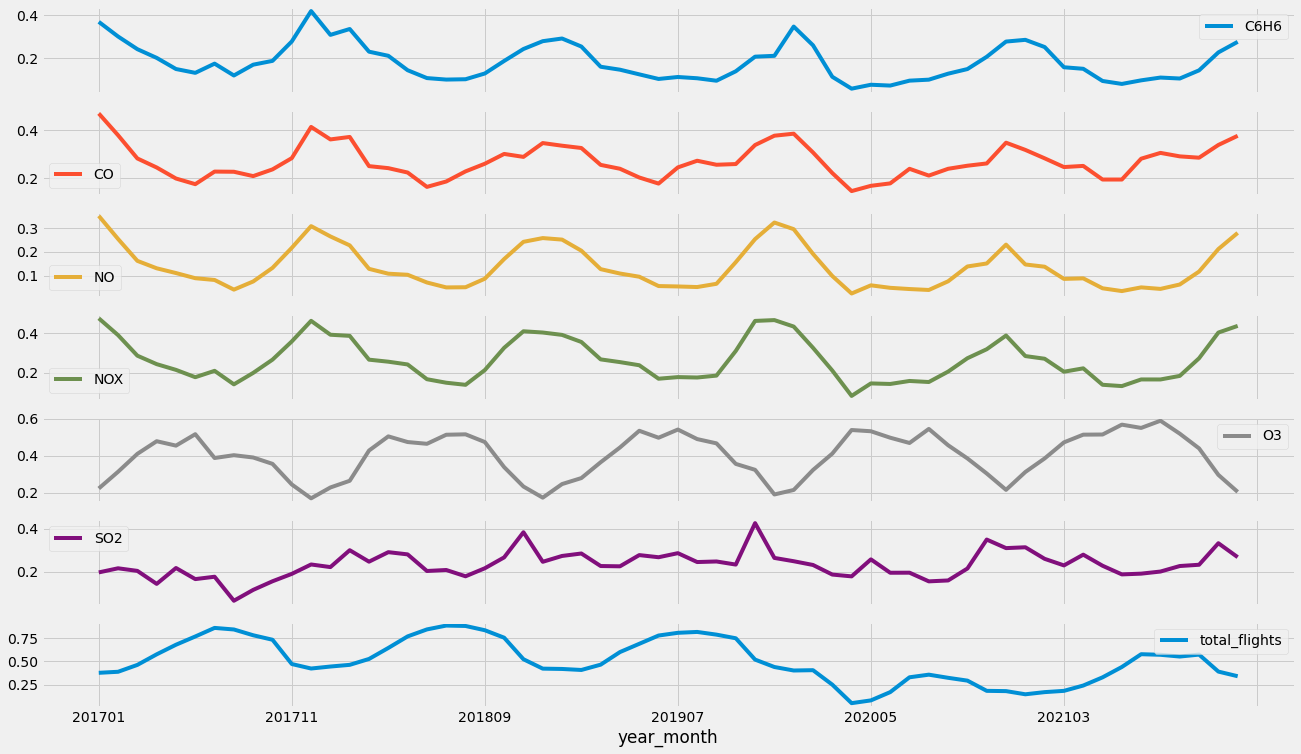

In [45]:
df = df_quality_traffic_norm.loc[df_quality_traffic_norm['airport']=='Larnaka'].copy()
df['year_month'] = df['date'].dt.strftime('%Y%m') 
df  = df.groupby(['year_month']).mean()
 
# Using a inbuilt style to change
# the look and feel of the plot
plt.style.use("fivethirtyeight")
 
df[col_val].plot(subplots=True, figsize=(20, 12))

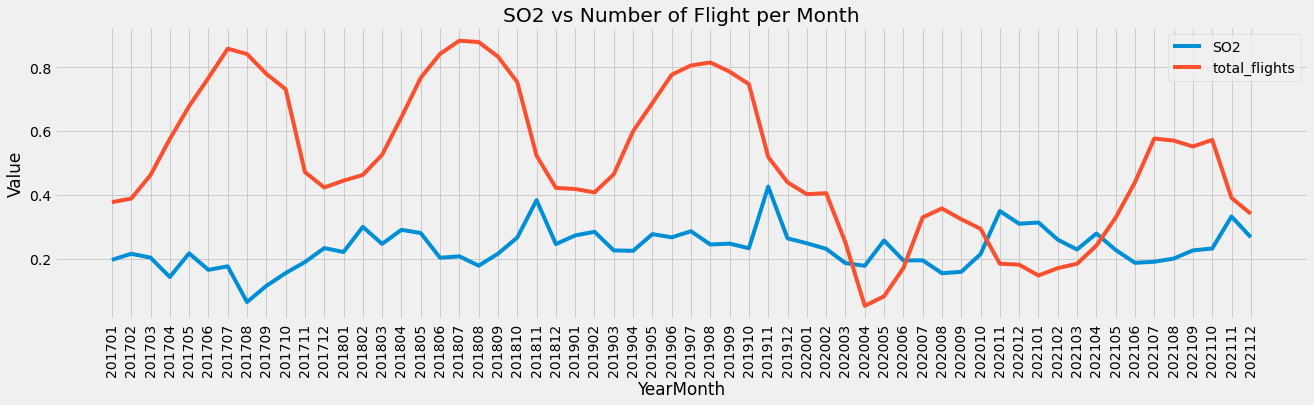

In [46]:
import matplotlib.pyplot as plt

def plot_trend(df,columns,xbl,ybl,title):
    # Using a inbuilt style to change
    # the look and feel of the plot
    plt.style.use("fivethirtyeight")

    # setting figure size to 12, 10
    plt.figure(figsize=(20, 5))

    plt.title(title)
    # Labelling the axes and setting
    # a title
    plt.xlabel(xbl)
    plt.ylabel(ybl)
    plt.xticks(rotation='vertical')
    plt.xticks
    
    for c in columns:
        plt.plot(df[c], label=c)
    
    plt.legend()
    plt.show()

    
col_val = ['SO2','total_flights']
df = df_quality_traffic_norm.loc[df_quality_traffic_norm['airport']=='Larnaka'].copy()
df['year_month'] = df['date'].dt.strftime('%Y%m')
df  = df.groupby(['year_month']).mean()
plot_trend(df,col_val,"YearMonth","Value","SO2 vs Number of Flight per Month")

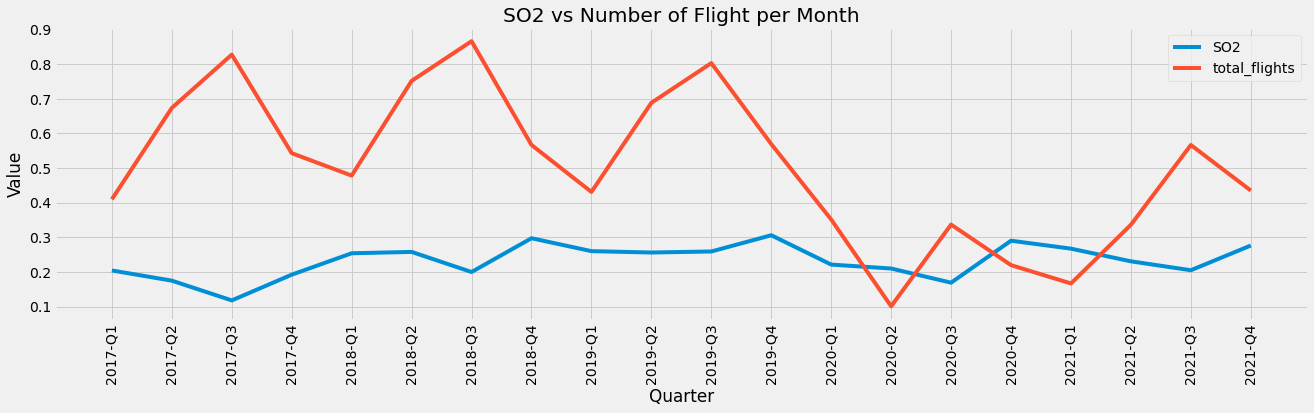

In [48]:
df = df_quality_traffic_norm.loc[df_quality_traffic_norm['airport']=='Larnaka'].copy()
df['quarter'] = (df['date'].dt.year.astype(str) + '-Q' + df['date'].dt.quarter.astype(str))
df  = df.groupby(['quarter']).mean()
col_val = ['SO2','total_flights']
plot_trend(df,col_val,"Quarter","Value","SO2 vs Number of Flight per Month")

##### Decompose Time-Series to See Components (Trend, Seasonality, Noise, etc)
Use the following custom function to decompose all of our time series with a montly seasonality (period=12 months):

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, share_type='amount', samples=250, period=24):
    if samples == 'all':
        #decomposing all time series timestamps
        res = seasonal_decompose(df[share_type].values, model='additive', period=period)
    else:
        #decomposing a sample of the time series
        res = seasonal_decompose(df[share_type].values[-samples:], model='additive', period=period)
    
    observed = res.observed
    trend = res.trend
    seasonal = res.seasonal
    residual = res.resid
    
    #plot the complete time series
    fig, axs = plt.subplots(4, figsize=(20,6))
    axs[0].set_title('OBSERVED', fontsize=14)
    axs[0].plot(observed)
    axs[0].grid()
    
    #plot the trend of the time series
    axs[1].set_title('TREND', fontsize=14)
    axs[1].plot(trend)
    axs[1].grid()
    
    #plot the seasonality of the time series. 
    #Period=24 daily seasonality | Period=24*7 weekly seasonality.
    axs[2].set_title('SEASONALITY', fontsize=14)
    axs[2].plot(seasonal)
    axs[2].grid()
    
    #plot the noise of the time series
    axs[3].set_title('NOISE', fontsize=14)
    axs[3].plot(residual)
    axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
    axs[3].grid()
    
    plt.show()

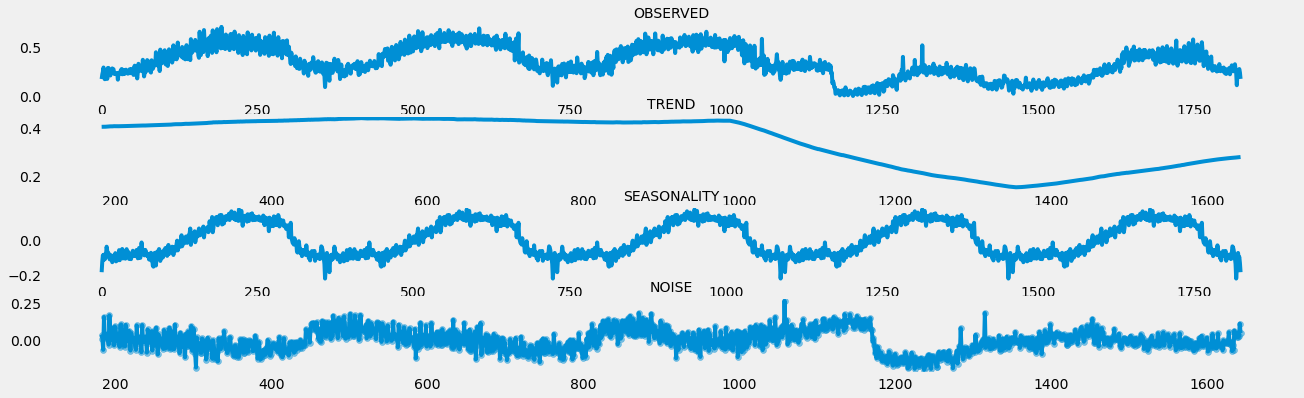

In [50]:
# https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas
df_plt = df_quality_traffic_norm.copy() 
df_plt = df_plt.groupby('date')['total_flights'].mean().reset_index()
decompose(df_plt,df_plt.columns.values[1], 2000,365)

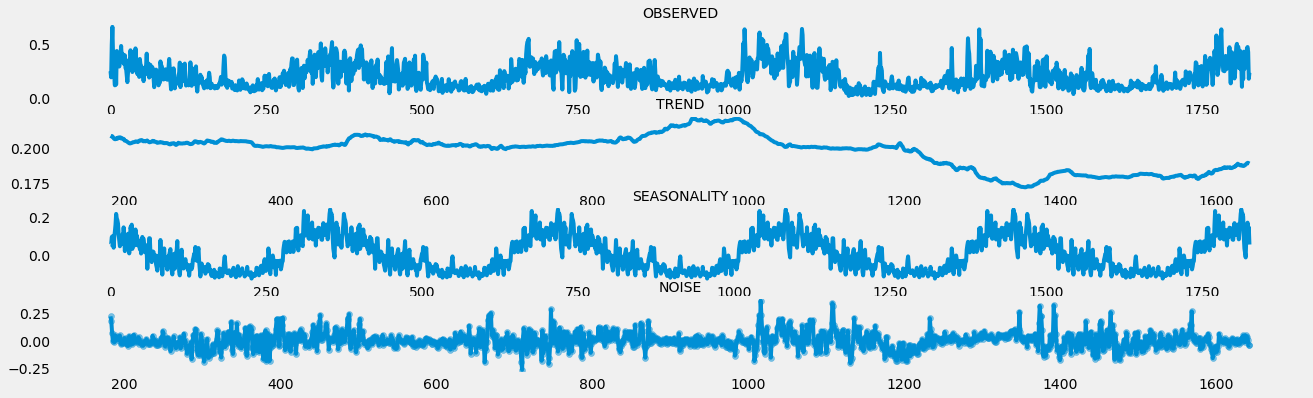

In [51]:
df_plt = df_quality_traffic_norm.copy()
df_plt = df_plt.groupby('date')['NOX'].mean().reset_index()
decompose(df_plt,df_plt.columns.values[1], 2000,365)

##### Checking Whether Time-Series is Stationary or Not 
We noticed from the above plots that there is the seasonality of 12 months in time-series. We can try different window sizes for testing purposes. We can check mean, variance and auto-covariance using moving window functions available with pandas

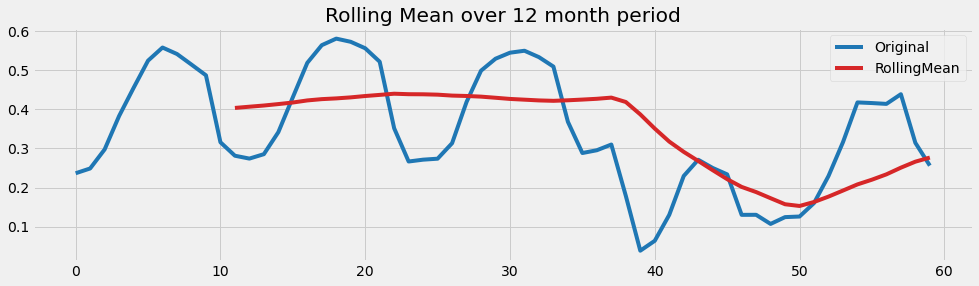

In [52]:
#plt_col = ['SO2_trend','total_flights']
df_plt = df_quality_traffic_norm.copy()
df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
df_plt = df_plt.groupby('year_month').mean()['total_flights'].reset_index()

df_plt['total_flights'].plot(figsize=(15,4), color="tab:blue", label = 'Original');
df_plt['total_flights'].rolling(window = 12).mean().plot(figsize=(15,4), color="tab:red", label = 'RollingMean', title="Rolling Mean over 12 month period");
plt.legend()

#### Auto-correlation Plot
Below we are also plotting an auto-correlation plot for time-series data as well. This plot helps us understand whether present values of time series are positively correlated, negatively correlated, or not related at all to past values. statsmodels library provides ready to use method plot_acf as a part of module statsmodels.graphics.tsaplots.

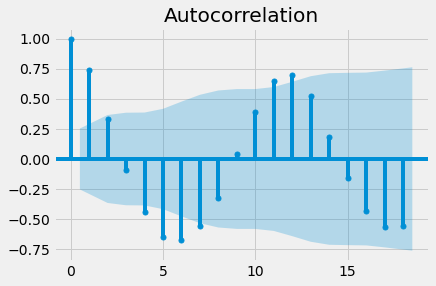

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
df_plt = df_quality_traffic_norm.copy()
df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
df_plt = df_plt.groupby('year_month')['NOX'].mean().reset_index()
plot_acf(df_plt['NOX']);

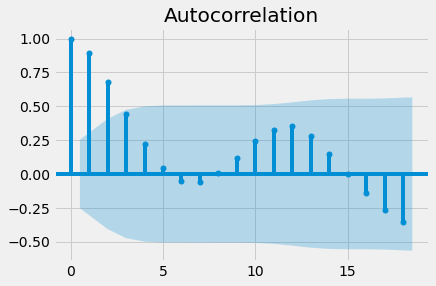

In [54]:
from statsmodels.graphics.tsaplots import plot_acf
df_plt = df_quality_traffic_norm.copy()
df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
df_plt = df_plt.groupby('year_month')['total_flights'].mean().reset_index()
plot_acf(df_plt['total_flights']);

#### Remove Seasonality by Applying Moving Window
As we have observed seasonality is generally present in the majority of values, we use the seasonal_decompose to extract the trend and use this for further analysis

In [55]:
df_decomposed = df_quality_traffic_norm[df_quality_traffic_norm['airport']=='Larnaka'].copy()
df_decomposed.index = pd.DatetimeIndex(df_decomposed['date'])
df_decomposed.index = pd.DatetimeIndex(df_decomposed.index.values,
                               freq=df_decomposed.index.inferred_freq)

#df_decomposed['date'] = pd.DatetimeIndex(df_decomposed['date'], freq=df_decomposed['date'].inferred_freq)

col_val = ['C6H6','CO','NO','NOX','O3','SO2','total_flights']
for c in col_val:
    decompose_result = seasonal_decompose(df_decomposed[c].values, model='additive', period=365)
    df_decomposed[str(c)+'_trend'] = decompose_result.trend
    
df_decomposed  = df_decomposed.loc[~df_decomposed.total_flights_trend.isna()]
df_decomposed.shape
df_decomposed.head(5)

,date,airport,C6H6,CO,NO,NOX,O3,SO2,total_flights,C6H6_trend,CO_trend,NO_trend,NOX_trend,O3_trend,SO2_trend,total_flights_trend
2017-07-02,2017-07-02,Larnaka,0.417821,0.412677,0.299211,0.537684,0.211827,0.506188,0.842271,0.229408,0.277915,0.162812,0.285526,0.363053,0.172179,0.614381
2017-07-03,2017-07-03,Larnaka,0.341287,0.226805,0.276117,0.486709,0.154032,0.284323,0.876972,0.228944,0.277307,0.162356,0.284996,0.363510,0.171933,0.614338
2017-07-04,2017-07-04,Larnaka,0.310712,0.313231,0.221622,0.387725,0.307609,0.285940,0.700315,0.228786,0.277220,0.162619,0.285359,0.363275,0.172354,0.614684
2017-07-05,2017-07-05,Larnaka,0.101952,0.207092,0.087651,0.174735,0.474584,0.215380,0.952681,0.228461,0.276155,0.161328,0.284073,0.363597,0.171999,0.614926
2017-07-06,2017-07-06,Larnaka,0.114967,0.163375,0.085028,0.193778,0.338840,0.219854,0.725552,0.228350,0.274933,0.159678,0.282686,0.364060,0.171425,0.614995


In [61]:
#df_quality_traffic.groupby(['year','month']).mean()
plt_col = ['C6H6_trend','CO_trend','NO_trend','NOX_trend','O3_trend','SO2_trend','total_flights_trend']
df_plt = df_decomposed.reset_index().copy()
df_plt = df_plt.loc[(df_plt['airport']=='Larnaka')&(df_plt.date.dt.year == 2020)]
df_plt[plt_col].corr().style.background_gradient(cmap='coolwarm')

,C6H6_trend,CO_trend,NO_trend,NOX_trend,O3_trend,SO2_trend,total_flights_trend
C6H6_trend,1.000000,-0.186195,-0.618929,-0.503349,0.746002,0.345908,-0.542021
CO_trend,-0.186195,1.000000,0.814748,0.896577,-0.619634,0.362652,0.900378
NO_trend,-0.618929,0.814748,1.000000,0.983627,-0.928669,-0.148349,0.883884
NOX_trend,-0.503349,0.896577,0.983627,1.000000,-0.864853,-0.014615,0.907825
O3_trend,0.746002,-0.619634,-0.928669,-0.864853,1.000000,0.311118,-0.797558
SO2_trend,0.345908,0.362652,-0.148349,-0.014615,0.311118,1.000000,0.261105
total_flights_trend,-0.542021,0.900378,0.883884,0.907825,-0.797558,0.261105,1.000000


In [66]:
from scipy.stats.stats import pearsonr

df = df_decomposed.loc[(df_decomposed['airport']=='Larnaka')&(df_decomposed.date.dt.year == 2020)].reset_index().copy()
plt_col = ['C6H6_trend','CO_trend','NO_trend','NOX_trend','O3_trend','SO2_trend']
pvt = []
for pollutant in plt_col:
    #calculation correlation coefficient and p-value between x and y
    x = df[pollutant]
    y = df['total_flights_trend']
    n = df[pollutant].count()
    r,p = pearsonr(x, y)
    t = r*np.sqrt((n-2) / (1-np.power(r,2)))
    pvt.append([pollutant,round(r,4),round(p,4),round(t,4)] )

pvt = pd.DataFrame(pvt, columns=['pollutant','coefficient','p-value','t-test'])
#pvt.set_index('pollutant').plot.bar()
pvt.sort_values('coefficient')

,pollutant,coefficient,p-value,t-test
4,O3_trend,-0.7976,0.0,-25.2244
0,C6H6_trend,-0.5420,0.0,-12.3055
5,SO2_trend,0.2611,0.0,5.1606
2,NO_trend,0.8839,0.0,36.0557
1,CO_trend,0.9004,0.0,39.4801
3,NOX_trend,0.9078,0.0,41.3025


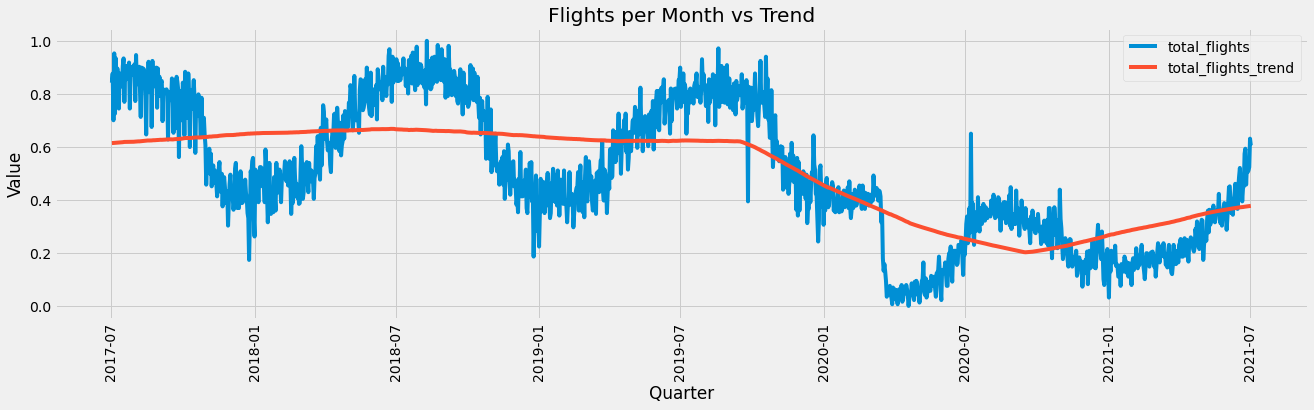

In [67]:
plt_col = ['total_flights','total_flights_trend']
df_plt = df_decomposed.copy()
#df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
#df_plt = df_plt.groupby('year_month').mean()
#f_plt = df_plt.set_index('year_month')[plt_col]
plot_trend(df_plt,plt_col,"Quarter","Value","Flights per Month vs Trend")

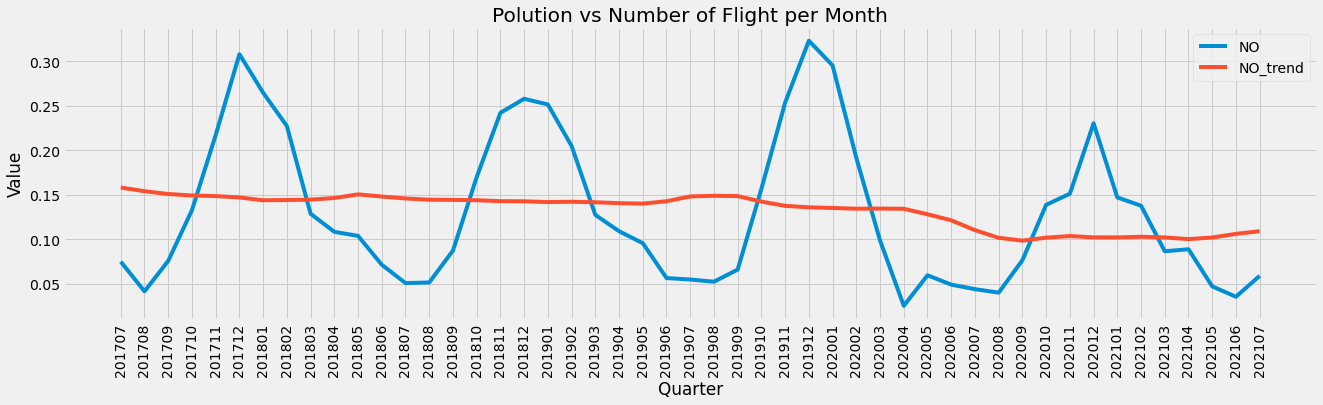

In [68]:
plt_col = ['NO','NO_trend']
df_plt = df_decomposed.copy()
df_plt['year_month'] = df_plt['date'].dt.strftime('%Y%m')
df_plt = df_plt.groupby('year_month').mean()
plot_trend(df_plt,plt_col,"Quarter","Value","Polution vs Number of Flight per Month")

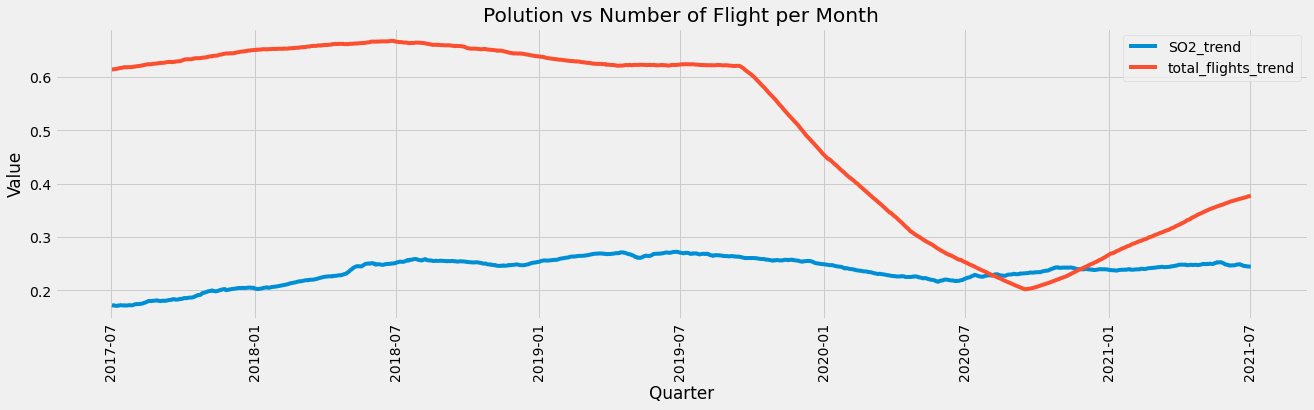

In [69]:
plt_col = ['SO2_trend','total_flights_trend']
df_plt = df_decomposed.copy()
df_plt = df_plt.set_index('date')[plt_col]
plot_trend(df_plt,plt_col,"Quarter","Value","Polution vs Number of Flight per Month")

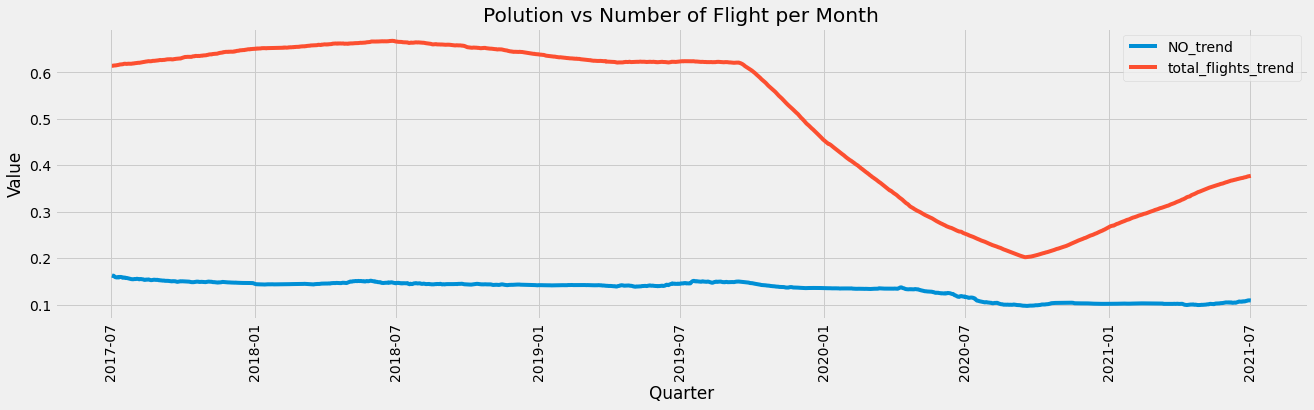

In [70]:
#https://www.noxfondet.no/en/articles/what-is-nox/
plt_col = ['NO_trend','total_flights_trend']
df_plt = df_decomposed.copy()
df_plt = df_plt.set_index('date')[plt_col]
plot_trend(df_plt,plt_col,"Quarter","Value","Polution vs Number of Flight per Month")

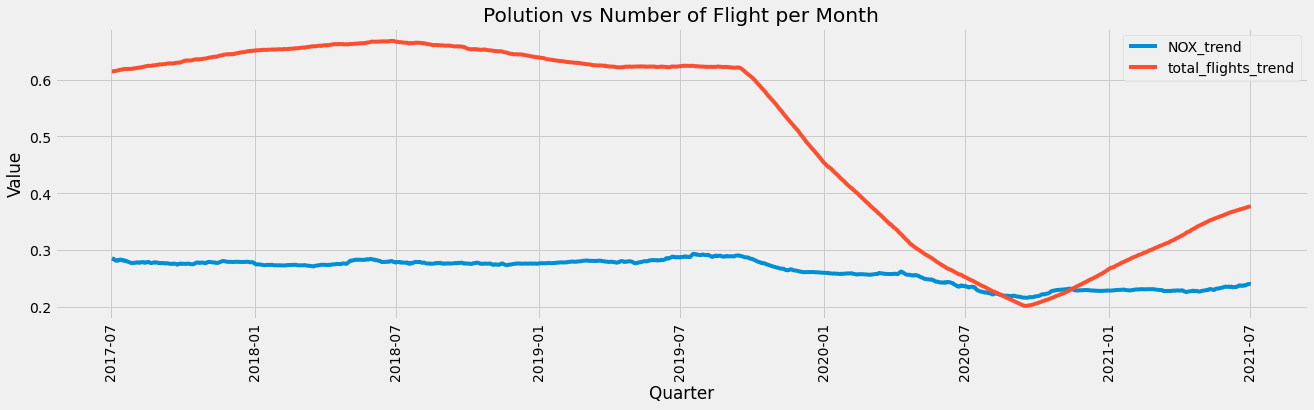

In [75]:
plt_col = ['NOX_trend','total_flights_trend']
df_plt = df_decomposed.copy()
df_plt = df_plt.set_index('date')[plt_col]
plot_trend(df_plt,plt_col,"Quarter","Value","Polution vs Number of Flight per Month")

##### Predictions
https://builtin.com/data-science/time-series-forecasting-python


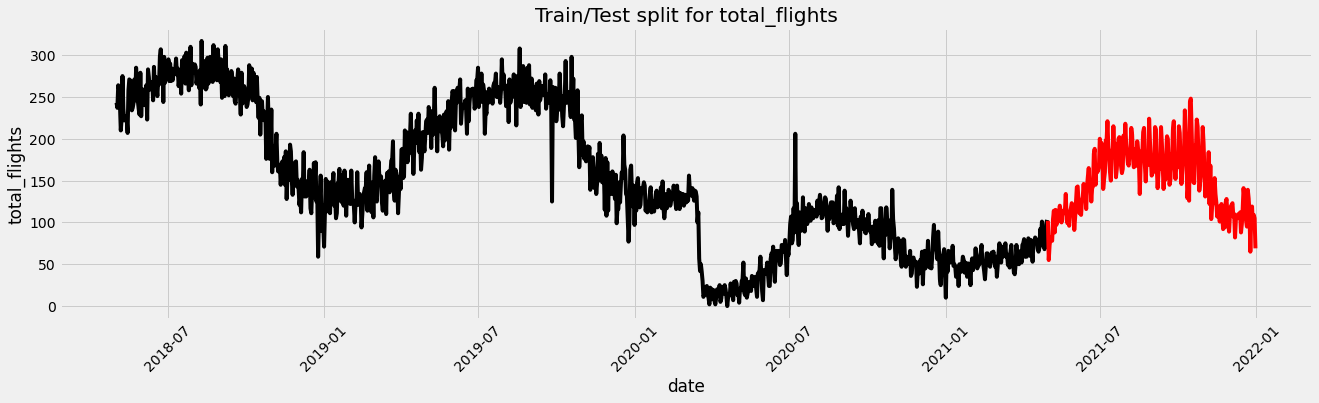

In [71]:
train = df_quality_traffic[(df_quality_traffic.airport=='Larnaka') \
                           &(df_quality_traffic.date > pd.to_datetime("2018-05-01", format='%Y-%m-%d')) \
                           &(df_quality_traffic.date < pd.to_datetime("2021-05-01", format='%Y-%m-%d'))] \
                            .set_index('date')
test = df_quality_traffic[(df_quality_traffic.airport=='Larnaka') \
                           &(df_quality_traffic.date >= pd.to_datetime("2021-05-01", format='%Y-%m-%d'))] \
                            .set_index('date')

train.index = pd.DatetimeIndex(train.index.values,
                               freq=train.index.inferred_freq)

plt.figure(figsize=(20, 5))
plt.plot(train['total_flights'], color = "black")
plt.plot(test['total_flights'], color = "red")
plt.ylabel('total_flights')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for total_flights")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  82.90394654154562


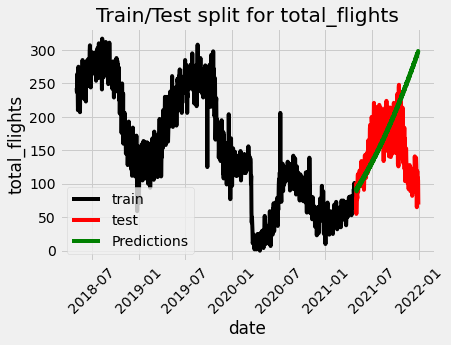

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#We can also evaluate the performance using the root mean-squared error:
import numpy as np
from sklearn.metrics import mean_squared_error

y = train['total_flights']
ARMAmodel = SARIMAX(y, order = (2, 3, 8))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

plt.plot(train['total_flights'], color = "black", label = 'train')
plt.plot(test['total_flights'], color = "red", label = 'test')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('total_flights')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for total_flights")
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(test["total_flights"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

# Autoregressive Integrated Moving Average (ARIMA)

In [73]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


RMSE:  1236.223428238602


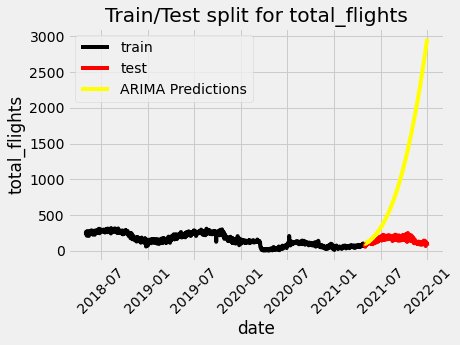

In [74]:
y = train['total_flights']

ARIMAmodel = ARIMA(y, order = (3, 4, 7))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train['total_flights'], color = "black", label = 'train')
plt.plot(test['total_flights'], color = "red", label = 'test')
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.ylabel('total_flights')
plt.xlabel('date')
plt.xticks(rotation=45)
plt.title("Train/Test split for total_flights")
plt.legend()

arma_rmse = np.sqrt(mean_squared_error(test["total_flights"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)